In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('input\Lionel Messi Goals (2).csv')
data


,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw
...,...,...,...,...,...,...,...,...,...,...,...
646,dimanche 17 juin 2007,Liga,Gimn�stic,Gimn�stic,FC Barcelona,35,0,2,NaN,Left foot,Won
647,dimanche 20 mai 2007,Liga,Atl�tico Madrid,Atl�tico Madrid,FC Barcelona,80,0,5,NaN,Left foot,Won
648,dimanche 20 mai 2007,Liga,Atl�tico Madrid,Atl�tico Madrid,FC Barcelona,39,0,1,NaN,Left foot,Won
649,samedi 17 mars 2007,Liga,Recreativo Huelva,Recreativo Huelva,FC Barcelona,86,0,4,NaN,Left foot,Won


In [56]:
df = data["Goal Type"].value_counts().reset_index()
df

,Goal Type,count
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


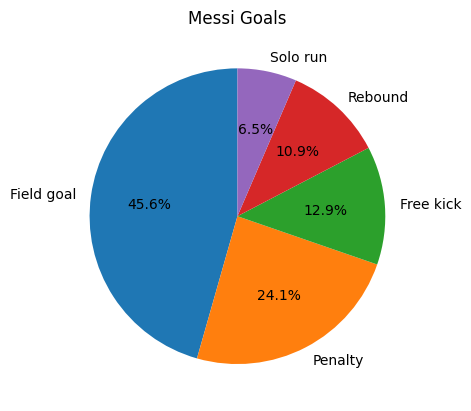

In [57]:
plt.pie(df['count'],labels=df['Goal Type'],autopct='%1.1f%%',startangle=90)
plt.title('Messi Goals')
plt.show()

In [58]:
df = data["Goal Method"].value_counts().reset_index()


<BarContainer object of 6 artists>

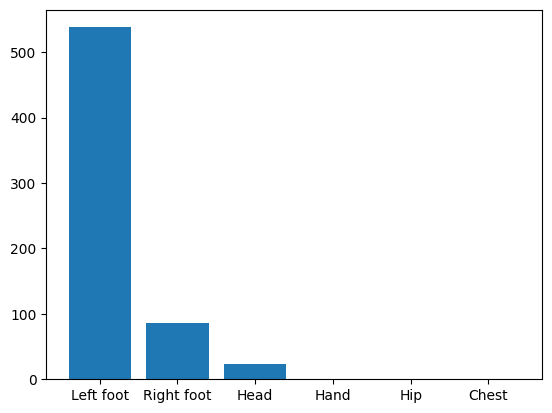

In [59]:
plt.bar(df['Goal Method'],df['count'])

In [60]:
data['Minute'] = data['Minute'].apply(eval)
data['Minute'] = data['Minute'].astype(int)

In [61]:
df = data['Minute'].value_counts().reset_index().sort_values(by='Minute')
df

,Minute,count
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


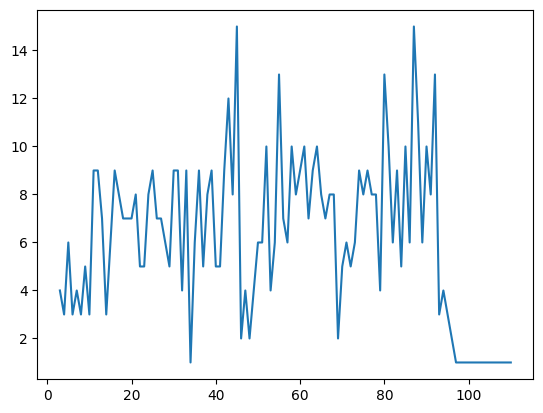

In [62]:
plt.plot(df['Minute'],df['count'])

In [63]:
def get_year(x):
    return x[-4:]
data['Date'] = data['Date'].apply(get_year)
data['Goal'] = data.index
df_goal_p_y = data.groupby(['Date'])['Goal'].nunique().reset_index()
df_goal_p_y

,Date,Goal
0,2005,3
1,2006,12
2,2007,31
3,2008,22
4,2009,41
5,2010,60
6,2011,59
7,2012,91
8,2013,45
9,2014,58


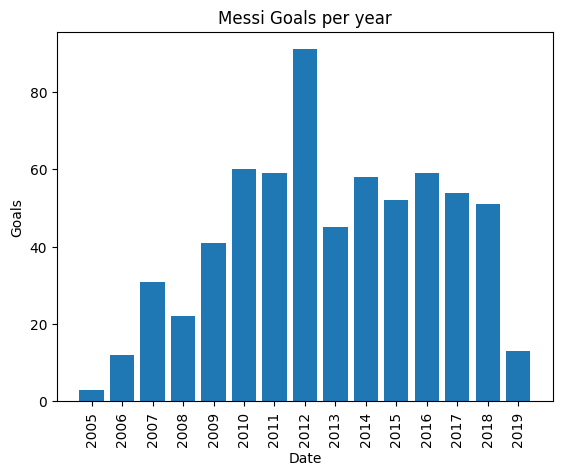

In [71]:
plt.bar(df_goal_p_y['Date'],df_goal_p_y['Goal'])
plt.title('Messi Goals per year')
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Goals')
plt.savefig('output/messi_goals_p_year.png')
plt.show()

In [65]:
data = data.rename(columns={"Goal Type":"Goal_Type","Goal Method":"Goal_Method"})

lfoot = data.query('Goal_Type == "Penalty"')['Goal_Method'].reset_index()
lfoot = lfoot.groupby(['Goal_Method'])['index'].nunique().reset_index()
lfoot.loc[len(lfoot)] = ['Right foot', 0]

lfoot

,Goal_Method,index
0,Left foot,82
1,Right foot,0


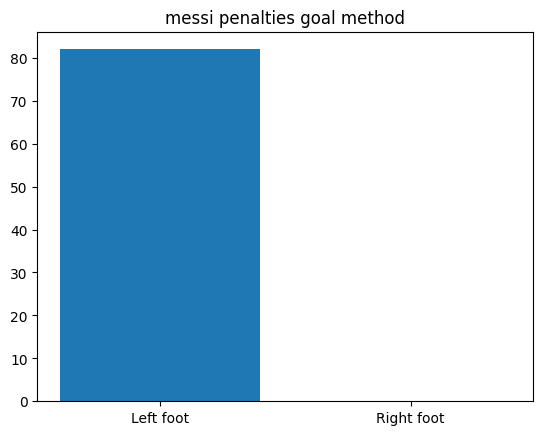

In [70]:
plt.bar(lfoot['Goal_Method'],lfoot['index'])
plt.title('messi penalties goal method')
plt.savefig('output/messi_penalty_goalmethod.png')

In [67]:
data

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal_Type,Goal_Method,Final Game Result,Goal
0,2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,0
1,2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,1
2,2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2
3,2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,3
4,2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,4
...,...,...,...,...,...,...,...,...,...,...,...,...
646,2007,Liga,Gimn�stic,Gimn�stic,FC Barcelona,35,0,2,NaN,Left foot,Won,646
647,2007,Liga,Atl�tico Madrid,Atl�tico Madrid,FC Barcelona,80,0,5,NaN,Left foot,Won,647
648,2007,Liga,Atl�tico Madrid,Atl�tico Madrid,FC Barcelona,39,0,1,NaN,Left foot,Won,648
649,2007,Liga,Recreativo Huelva,Recreativo Huelva,FC Barcelona,86,0,4,NaN,Left foot,Won,649


In [68]:
data['goals'] = data['Score Away Team - When Messi Scored'] + data['Score Home Team - When Messi Scored']
data['Index'] = data.index
data = data.rename(columns={"Final Game Result":"Final_Result"})
df = data.query('(Minute > 90) and (goals>0)')

df = df.groupby(['Final_Result'])['Index'].nunique().reset_index()
df

,Final_Result,Index
0,Draw,1
1,Lost,2
2,Won,27


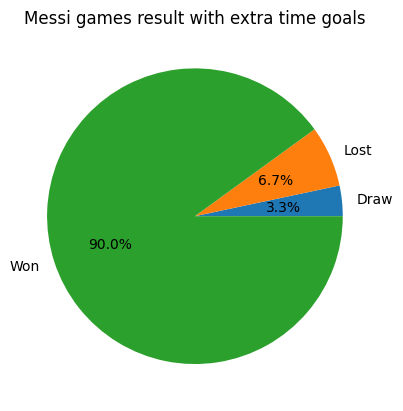

In [69]:
plt.pie(df['Index'],labels=df['Final_Result'],autopct='%1.1F%%')
plt.title('Messi games result with extra time goals')
plt.savefig('output/messi_games_extrat_goals.png')